In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from scipy import stats
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest

In [70]:
df = pd.read_csv("indexData.csv")

In [3]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


**Summary**

In [150]:
df.describe().T.astype(str)

,count,mean,std,min,25%,50%,75%,max
Open,110253.0,7658.515221546677,9011.478912965997,54.869999,1855.030029,5194.089844,10134.29981,68775.0625
High,110253.0,7704.3729612770485,9066.638548034764,54.869999,1864.51001,5226.279785,10207.82031,69403.75
Low,110253.0,7608.000422337691,8954.506981251916,54.869999,1843.97998,5154.049805,10060.34961,68516.99219
Close,110253.0,7657.545871842794,9011.510443530464,54.869999,1855.060059,5194.75,10134.83008,68775.0625
Adj Close,110253.0,7657.351729363721,9011.608899984878,54.869999,1854.179565,5194.75,10134.83008,68775.0625
Volume,110253.0,1273975162.6030312,4315783120.880937,0.0,0.0,432900.0,173431400.0,94403740000.0


In [4]:
df.shape

(112457, 8)

**Duplicate value check**

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [9]:
df.dtypes

Index         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [7]:
df["Index"].nunique()

14

**Null value check**

In [8]:
df.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

**Drop null data**

In [71]:
df = df.dropna()

In [72]:
df.isna().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
df.shape

(110253, 8)

**Sorting the Data based on date field**

In [73]:
df.sort_values(by=['Date'], inplace=True)
df.index = pd.RangeIndex(len(df.index))

**Converting date column objetc to datetime**

In [74]:
df["Date"]=pd.to_datetime(df["Date"])
df['Year']=df["Date"].dt.year
df["Year"].nunique()

57

**Commonality check**

In [15]:
df3 = df[df['Open'] == df['Close']]
df4 = df3[df3['Open'] == df3['High']]
df5 = df4[df4['High'] == df4['Low']]

In [16]:
df5.shape

(20990, 9)

**Any difference between Close and Adj Close**

In [17]:
df6 = df[df['Close'] != df['Adj Close']]

In [18]:
df6.shape

(13046, 9)

**Data Analysis**

**Uni-Variate Analysis**

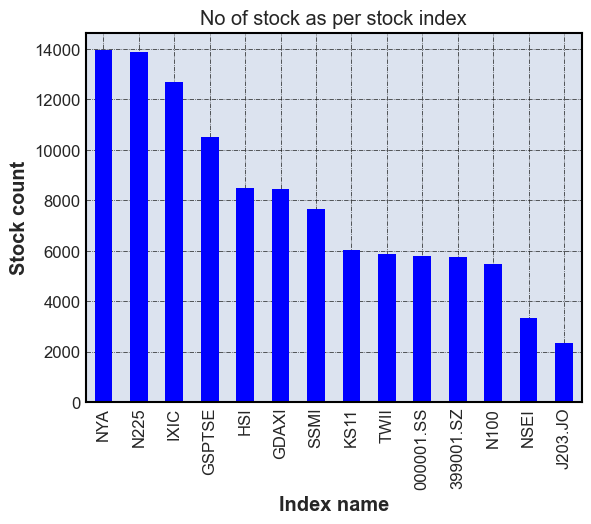

In [20]:
df["Index"].value_counts().plot(kind='bar',color='Blue');
plt.xlabel("Index name");
plt.ylabel("Stock count");
plt.title("No of stock as per stock index");
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

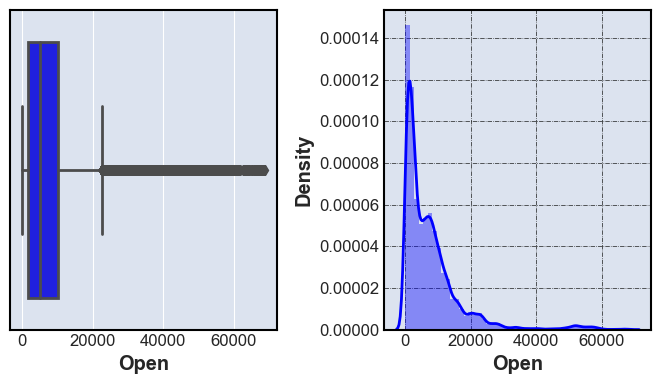

In [21]:
fig, (x1,x2)=plt.subplots(1,2,figsize=(7,4))
sns.boxplot(x='Open',data=df,ax=x1,color='blue');
sns.distplot(df['Open'],ax=x2,color='blue');
plt.tight_layout()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

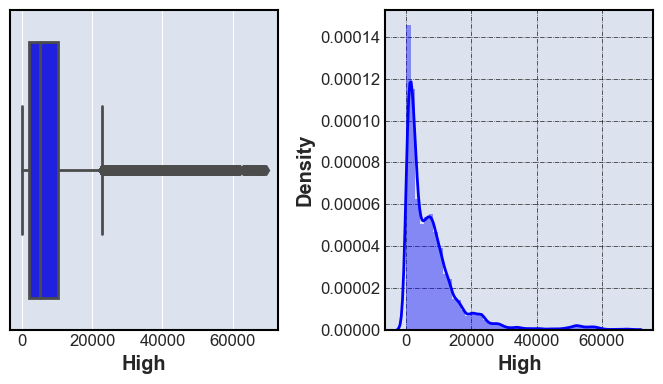

In [22]:
fig, (x1,x2)=plt.subplots(1,2,figsize=(7,4))
sns.boxplot(x='High',data=df,ax=x1,color='Blue');
sns.distplot(df['High'],ax=x2,color='blue');
plt.tight_layout()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

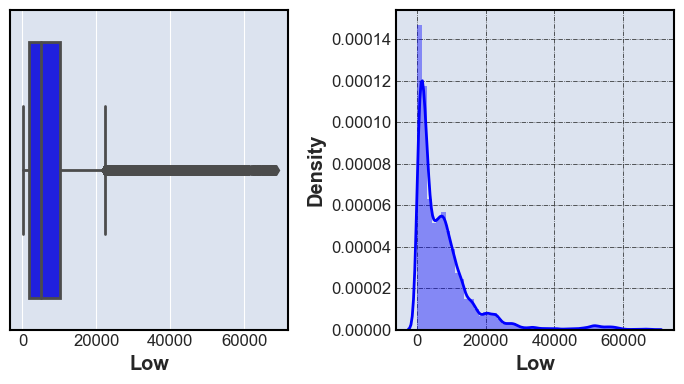

In [23]:
fig, (x1,x2)=plt.subplots(1,2,figsize=(7,4))
sns.boxplot(x='Low',data=df,ax=x1,color='blue');
sns.distplot(df['Low'],ax=x2,color='blue');
plt.tight_layout()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

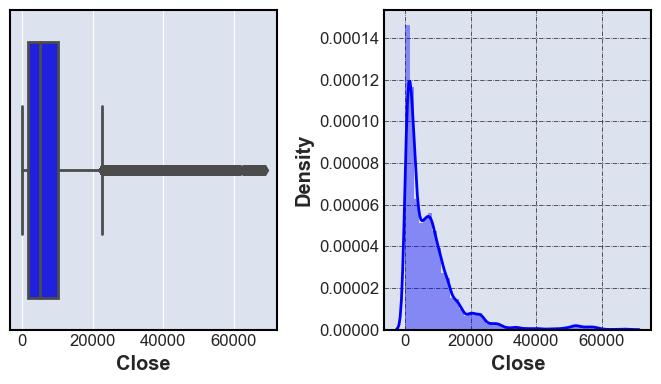

In [24]:
fig, (x1,x2)=plt.subplots(1,2,figsize=(7,4))
sns.boxplot(x='Close',data=df,ax=x1,color='blue');
sns.distplot(df['Close'],ax=x2,color='blue');
plt.tight_layout()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

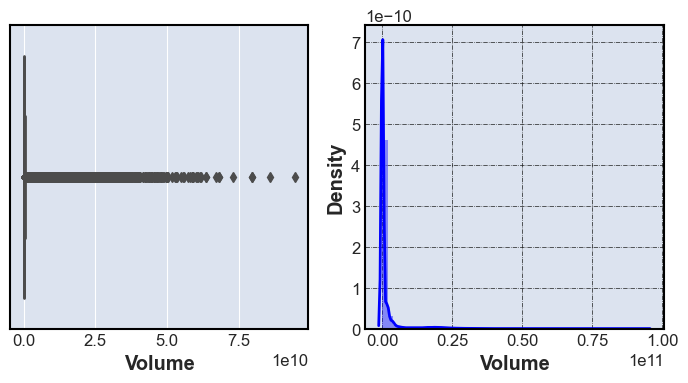

In [25]:
fig, (x1,x2)=plt.subplots(1,2,figsize=(7,4))
sns.boxplot(x='Volume',data=df,ax=x1,color='blue');
sns.distplot(df['Volume'],ax=x2,color='blue');
plt.tight_layout()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

**Bi-variate analysis**

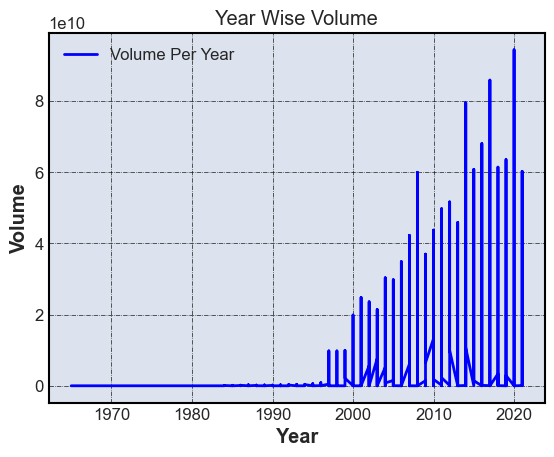

In [26]:
plt.plot(df['Year'],df['Volume'],color='blue',label='Volume Per Year');
plt.xlabel("Year")
plt.ylabel("Volume")
plt.title("Year Wise Volume")
plt.legend();
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

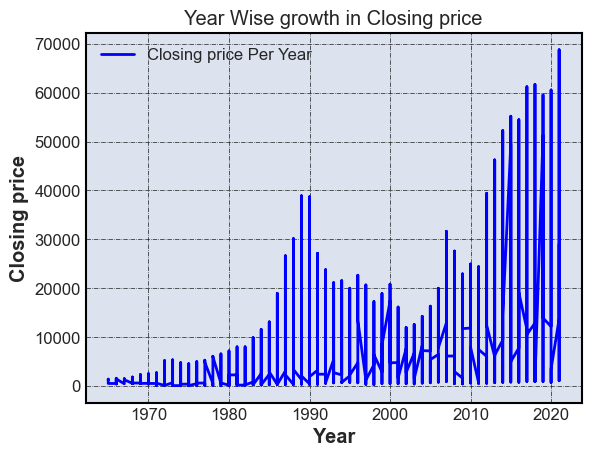

In [27]:
plt.plot(df['Year'],df['Close'],color='blue',label='Closing price Per Year');
plt.xlabel("Year")
plt.ylabel("Closing price")
plt.title("Year Wise growth in Closing price")
plt.legend();
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

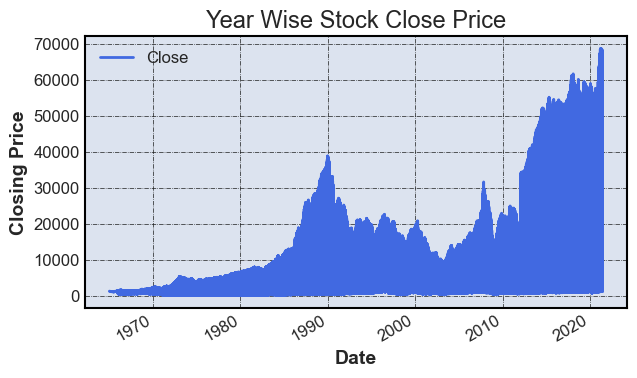

In [29]:
import datetime
df.plot(x='Date',y='Close',figsize=(7, 4),color='royalblue')
plt.title("Year Wise Stock Close Price", fontsize=17)
plt.ylabel('Closing Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

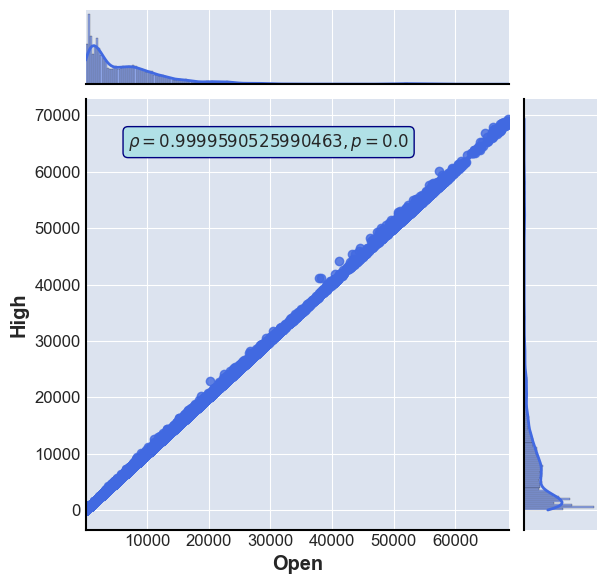

In [27]:
j = sns.jointplot('Open','High',data=df,kind='reg', color='royalblue')
r, p = stats.pearsonr(df['Open'],df['High'])
j.ax_joint.annotate(f'$\\rho = {r}, p = {p}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
plt.show()

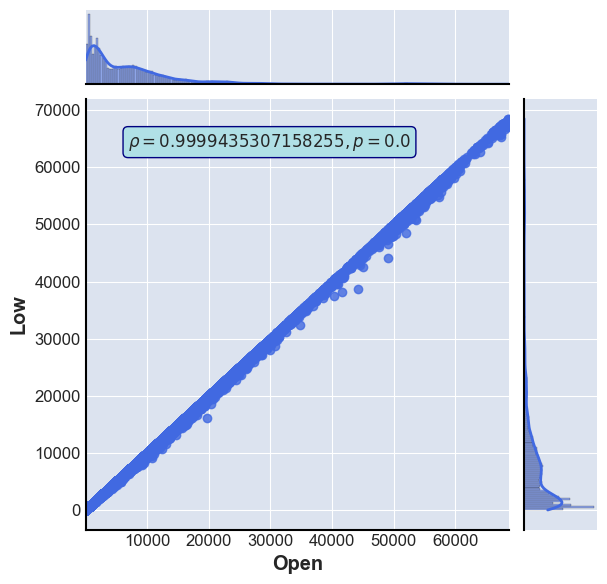

In [28]:
j = sns.jointplot('Open','Low',data=df,kind='reg', color='royalblue')
r, p = stats.pearsonr(df['Open'],df['Low'])
j.ax_joint.annotate(f'$\\rho = {r}, p = {p}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
plt.show()

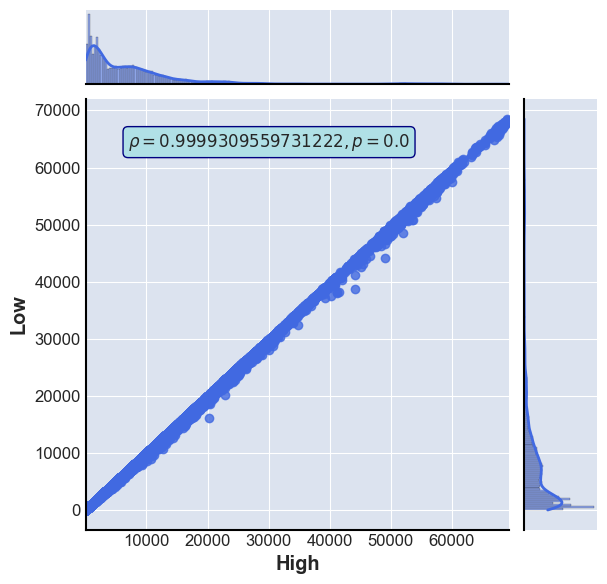

In [29]:
j = sns.jointplot('High','Low',data=df,kind='reg', color='royalblue')
r, p = stats.pearsonr(df['High'],df['Low'])
j.ax_joint.annotate(f'$\\rho = {r}, p = {p}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
plt.show()

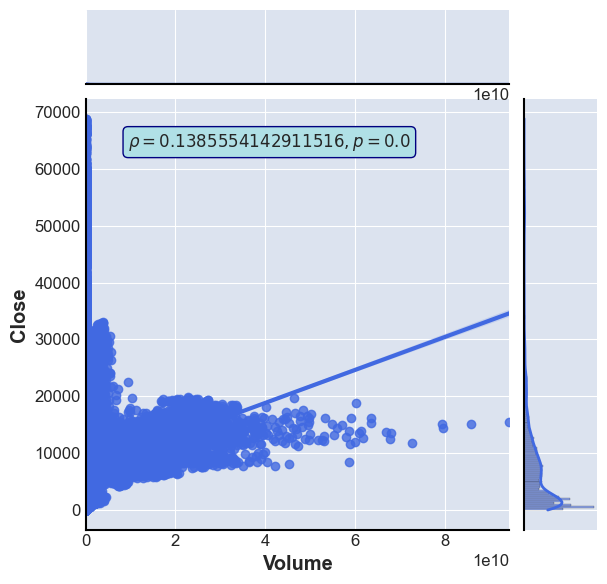

In [268]:
j = sns.jointplot('Volume','Close',data=df,kind='reg', color='royalblue')
r, p = stats.pearsonr(df['Volume'],df['Close'])
j.ax_joint.annotate(f'$\\rho = {r}, p = {p}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
plt.show()

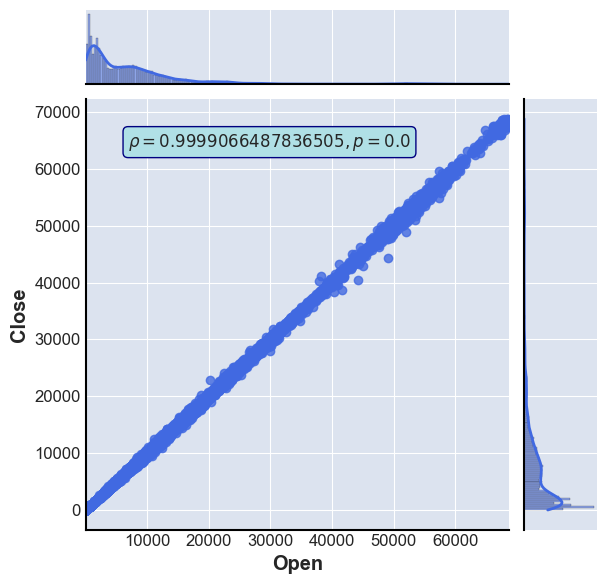

In [269]:
j = sns.jointplot('Open','Close',data=df,kind='reg', color='royalblue')
r, p = stats.pearsonr(df['Open'],df['Close'])
j.ax_joint.annotate(f'$\\rho = {r}, p = {p}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
plt.show()

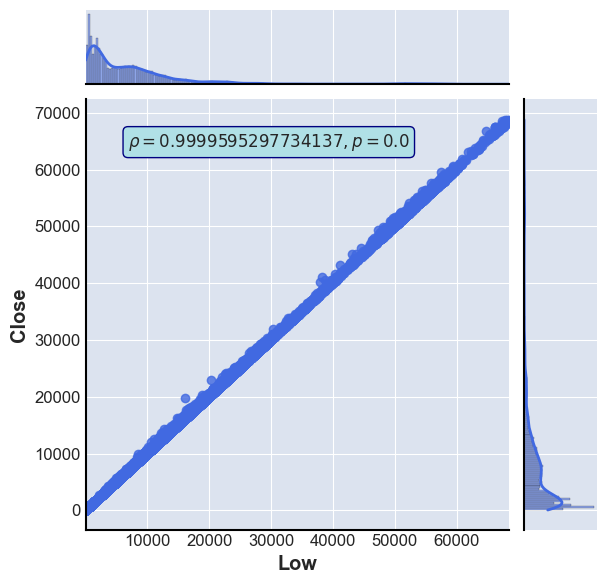

In [270]:
j = sns.jointplot('Low','Close',data=df,kind='reg', color='royalblue')
r, p = stats.pearsonr(df['Low'],df['Close'])
j.ax_joint.annotate(f'$\\rho = {r}, p = {p}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
plt.show()

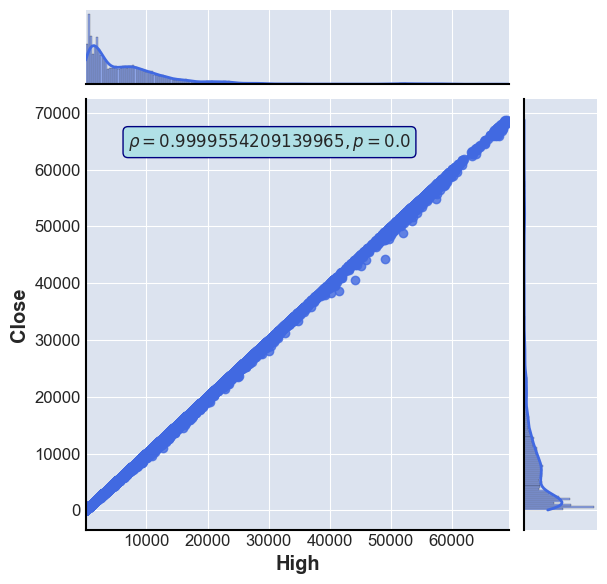

In [271]:
j = sns.jointplot('High','Close',data=df,kind='reg', color='royalblue')
r, p = stats.pearsonr(df['High'],df['Close'])
j.ax_joint.annotate(f'$\\rho = {r}, p = {p}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
plt.show()

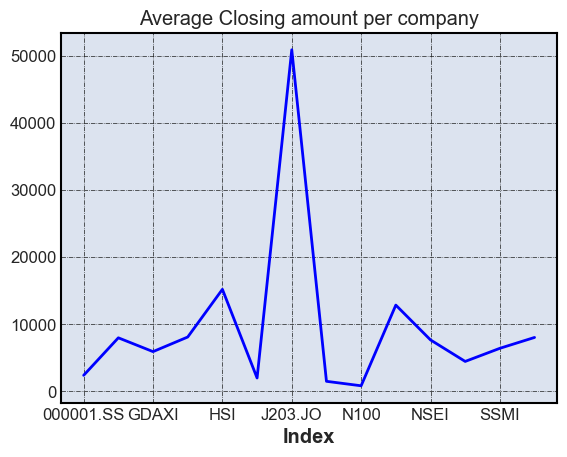

In [33]:
df.groupby(['Index'])['Close'].mean().plot(color='Blue');
plt.title("Average Closing amount per company");
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

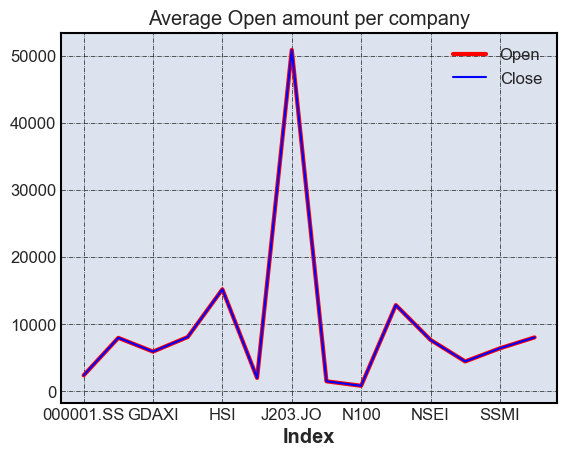

In [34]:
df.groupby(['Index'])['Open'].mean().plot(color='red',lw=3)
df.groupby(['Index'])['Close'].mean().plot(color='Blue',lw=1.5);
plt.title("Average Open amount per company");
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend()

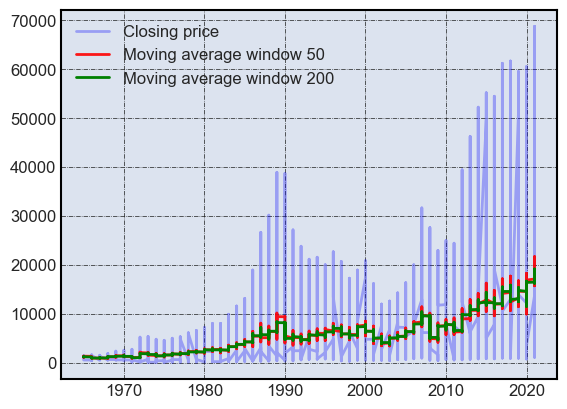

In [273]:
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
plt.plot(df['Year'],df['Close'],color='blue',alpha=0.3,label='Closing price');
plt.plot(df['Year'],df['MA50'],color='red',alpha=0.9,label='Moving average window 50');
plt.plot(df['Year'],df['MA200'],color='green',label='Moving average window 200');
#df['Open'].plot(figsize = (7,4),color='green');
#df['MA50'].plot(color='blue');
#df['MA200'].plot(color='red');
plt.legend()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

**Multi-Variate**

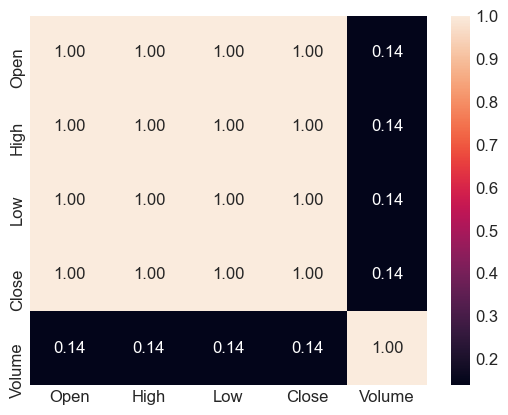

In [275]:
df_rm = df.drop(["Adj Close",'Year','MA50','MA200'],axis=1)
sns.heatmap(df_rm.corr(),annot=True,fmt=".2f");
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

**Model Building**

In [189]:
df_pred = df
df_pred = df.drop(columns='Date')
df_pred = df_pred.drop(columns='Year')
df_pred = df_pred.drop(columns='Index')
df_pred = df_pred.drop(columns='Adj Close')
df_pred = df_pred.drop(columns='MA50')
df_pred = df_pred.drop(columns='MA200')

In [88]:
df_pred.head()

,Open,High,Low,Close,Volume
0,1257.719971,1257.719971,1257.719971,1257.719971,0.0
1,1263.989990,1263.989990,1263.989990,1263.989990,0.0
2,1274.270020,1274.270020,1274.270020,1274.270020,0.0
3,1286.430054,1286.430054,1286.430054,1286.430054,0.0
4,1288.540039,1288.540039,1288.540039,1288.540039,0.0


**Multicollinearity check**

In [190]:
X = df_pred
X.drop(["Close"],axis=1,inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature           VIF
0    Open  28169.859601
1    High  23037.968192
2     Low  16698.492276
3  Volume      1.088620


**Train Test Split**

In [187]:
X=df_pred.drop('Close',axis=1)
y=df_pred["Close"]

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [117]:
X_train,X_test,Y_train,Y_test=train_test_split(X_sc,y,test_size=.30,random_state=1)

In [113]:
close_train = Y_train.copy()
close_test = Y_test.copy()

In [118]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (77177, 4)
X_test (33076, 4)
Y_train (77177,)
Y_test (33076,)


**Lasso regression**

**Simple method**

In [104]:
from sklearn.metrics import mean_absolute_error
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, Y_train)
lasso_predictions = lasso_model.predict(X_test)


print('R-square score is :', r2_score(Y_test, lasso_predictions))
print('Mean Squared Error:', (metrics.mean_squared_error(Y_test,lasso_predictions))) 
print('Mean absolute Error:', mean_absolute_error(Y_test,lasso_predictions))
print("Root means square:", (mean_squared_error(Y_test, lasso_predictions,squared=False)))
print("Test score:",lasso_model.score(X_test, Y_test))

R-square score is : 0.999832035331259
Mean Squared Error: 13442.74629482838
Mean absolute Error: 51.46376870600465
Root means square: 115.94285788623799
Test score: 0.999832035331259


In [40]:
print("coefficient",lasso_model.coef_)

coefficient [8055.20056708  783.05782366  172.42907686   -0.        ]


**K-Fold cross validation**

In [201]:
from sklearn.linear_model import LassoCV

model = LassoCV(alphas = np.logspace(0, 0.01, 100),cv=10, random_state=1, max_iter=10000,tol=0.0001,fit_intercept=True)

model.fit(X_train, Y_train)

lasso_predictions = model.predict(X_test)

print('R-square score is :', r2_score(Y_test, lasso_predictions))
print('Mean Squared Error:', (metrics.mean_squared_error(Y_test,lasso_predictions))) 
print('Mean absolute Error:', mean_absolute_error(Y_test,lasso_predictions))
print("Root means square:", np.sqrt(mean_squared_error(Y_test, lasso_predictions)))

R-square score is : 0.9999303393988682
Mean Squared Error: 5575.159316415123
Mean absolute Error: 34.95019954114819
Root means square: 74.66698946934396


In [42]:
print(list(zip(model.coef_, X)))

[(1352.5521847878292, 'Open'), (5311.243144410422, 'High'), (2346.6689407951408, 'Low'), (0.0, 'Volume')]


**Feature selection**

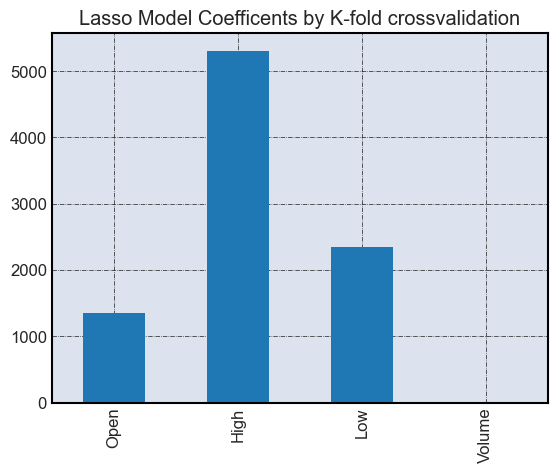

In [43]:
coef = pd.Series(model.coef_,list(X.columns))
coef.plot(kind='bar',title="Lasso Model Coefficents by K-fold crossvalidation");
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

**Using Pipeline**

In [49]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model
lasso = Lasso(alpha=1.0)
selection = ["cyclic", "random"]
normalize = [True, False]
std = StandardScaler()
lasso = linear_model.Lasso()
pipe = Pipeline(steps=[("std", std),
                           ("lasso", lasso)])

parameters = dict(lasso__normalize=normalize,
                      lasso__selection=selection)
clf = GridSearchCV(pipe, parameters,cv = 2)

clf.fit(X_train,Y_train)
lasso_pipe = clf.predict(X_test)

print("RMSE using Lasso pipeline is:",np.sqrt(mean_squared_error(Y_test, lasso_pipe)))
print('R-square score is :', r2_score(Y_test, lasso_pipe))
print('Mean Squared Error:', (metrics.mean_squared_error(Y_test,lasso_pipe))) 
print("Root means square:", np.sqrt(mean_squared_error(Y_test, lasso_pipe)))
print("Test score:",clf.score(X_test, Y_test))
print('Mean absolute Error:', mean_absolute_error(Y_test,lasso_predictions))
clf.best_params_

RMSE using Lasso pipeline is: 85.42814916658452
R-square score is : 0.9999088132094991
Mean Squared Error: 7297.968670028215
Root means square: 85.42814916658452
Test score: 0.9999088132094991
Mean absolute Error: 34.95019954114819


{'lasso__normalize': False, 'lasso__selection': 'random'}

In [288]:
clf.best_estimator_

Pipeline(steps=[('std', StandardScaler()),
                ('lasso', Lasso(selection='random'))])

**Plotting**

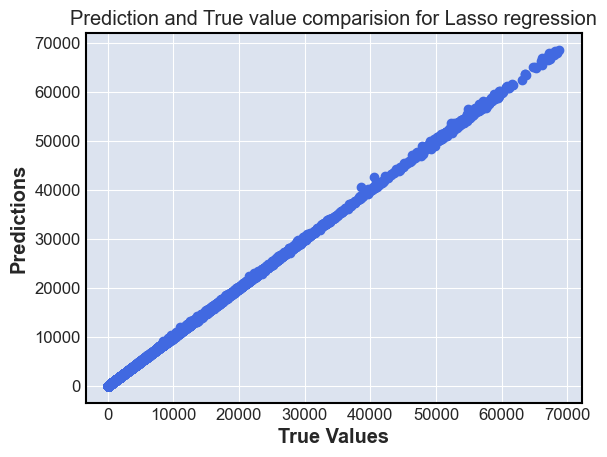

In [106]:
pred_data = pd.DataFrame().assign(Y_test=Y_test,Y_pred=lasso_predictions)
pred_data.index = pd.RangeIndex(len(pred_data.index))
plt.scatter(Y_test, lasso_predictions, c='royalblue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title("Prediction and True value comparision for Lasso regression")
plt.show()

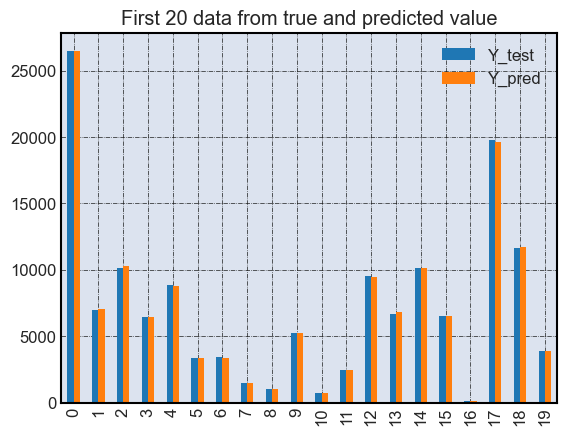

In [124]:
graph = pred_data.head(20)
graph.plot(kind='bar')
plt.title("First 20 data from true and predicted value")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

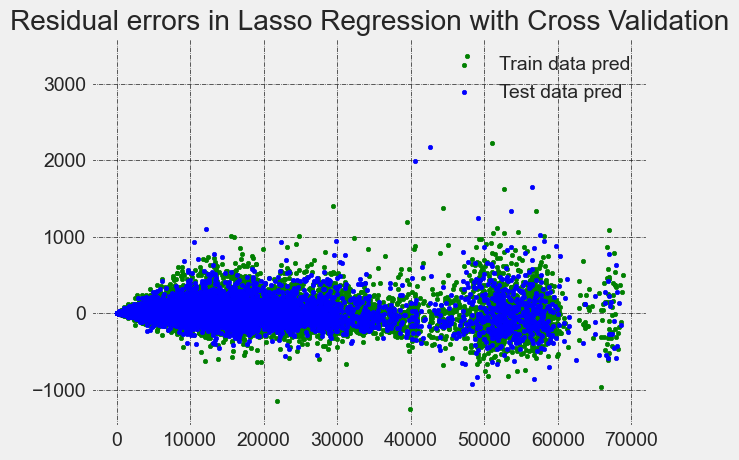

In [208]:
plt.style.use('fivethirtyeight')
plt.scatter(model.predict(X_train), model.predict(X_train) - Y_train,
            color = "green", s = 10, label = 'Train data pred')

plt.scatter(model.predict(X_test), model.predict(X_test) - Y_test,
            color = "blue", s = 10, label = 'Test data pred')

plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

plt.legend(loc = 'upper right')

plt.title("Residual errors in Lasso Regression with Cross Validation")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)  
plt.show()

**Ridge Regression**

In [204]:
rg = Ridge(alpha=0.01)
rg.fit(X_train, Y_train) 
pred_train= rg.predict(X_train)
pred_test= rg.predict(X_test)
print("Test root mean square error for ridge reg:",np.sqrt(mean_squared_error(Y_test,pred_test)) )
print("Test score for ridge reg:",r2_score(Y_test, pred_test))
print("Test score:",rg.score(X_test, Y_test))
print('Mean absolute Error:', mean_absolute_error(Y_test,pred_test))

Test root mean square error for ridge reg: 48.17669690827795
Test score for ridge reg: 0.9999709996007659
Test score: 0.9999709996007659
Mean absolute Error: 22.361747237923456


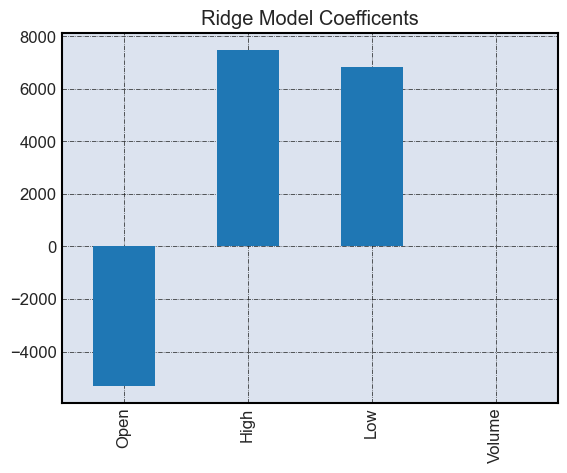

In [244]:
coef_rg = pd.Series(rg.coef_,list(X.columns))
coef_rg.plot(kind='bar',title="Ridge Model Coefficents");
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

**Cross validation with ridge regression**

In [203]:
ridge_model = RidgeCV(alphas=np.logspace(0, 0.01, 100),scoring='neg_mean_squared_error',cv = 10)
ridge_model = ridge_model.fit(X_train, Y_train)
ridge_test= ridge_model.predict(X_test)

print("Test mean square error for ridge reg:",np.sqrt(mean_squared_error(Y_test,ridge_test)) )
print("Test score for ridge reg:",r2_score(Y_test, ridge_test))
print('Mean absolute Error:', mean_absolute_error(Y_test,ridge_test))

Test mean square error for ridge reg: 50.656796349136066
Test score for ridge reg: 0.9999679369098128
Mean absolute Error: 24.275777902913255


**Uisng Grid Search and Pipeline**

In [52]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model

pipe =[
    ('scalar', StandardScaler()),
    ('model', Ridge())
]

ridge_pipe = Pipeline(pipe)
parameters = [ {'model__alpha': np.arange(0, 0.2, 0.01) } ]

from sklearn.metrics import mean_squared_error, make_scorer

scoring_func = make_scorer(mean_squared_error)

grid_search = GridSearchCV(estimator = ridge_pipe, 
                           param_grid = parameters,
                           scoring = scoring_func,
                           cv = 10,
                           n_jobs = -1)

grid_search.fit(X_train,Y_train)

ridge_pipe = grid_search.predict(X_test)

print("RMSE using Lasso pipeline is:",np.sqrt(mean_squared_error(Y_test, ridge_pipe)))
print('R-square score is :', r2_score(Y_test, ridge_pipe))
print('Mean Squared Error:', (metrics.mean_squared_error(Y_test,ridge_pipe))) 
print("Root means square:", np.sqrt(mean_squared_error(Y_test, ridge_pipe)))
print("Test score:",grid_search.score(X_test, Y_test))
print('Mean absolute Error:', mean_absolute_error(Y_test,ridge_pipe))

grid_search.best_params_

RMSE using Lasso pipeline is: 48.334734319107234
R-square score is : 0.9999708090245946
Mean Squared Error: 2336.246541698683
Root means square: 48.334734319107234
Test score: 2336.246541698683
Mean absolute Error: 22.669862420785453


{'model__alpha': 0.19}

**Plotting**

Text(0.5, 1.0, 'First 20 data comparision between True and Predicted using Ridge')

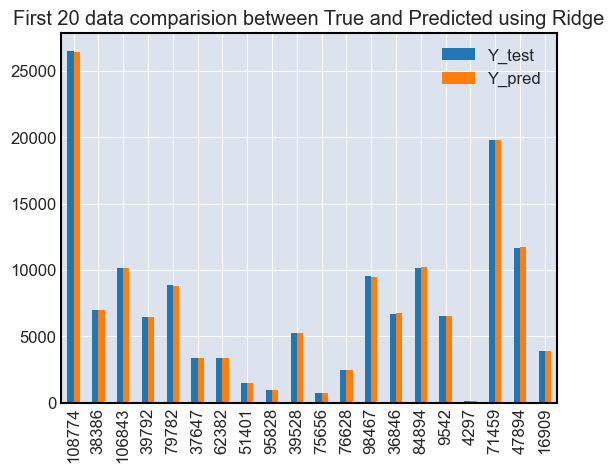

In [247]:
ridge_df = pd.DataFrame().assign(Y_test=Y_test,Y_pred=pred_test)
graph_rg = ridge_df.head(20)
graph_rg.plot(kind='bar')
plt.title("First 20 data comparision between True and Predicted using Ridge")

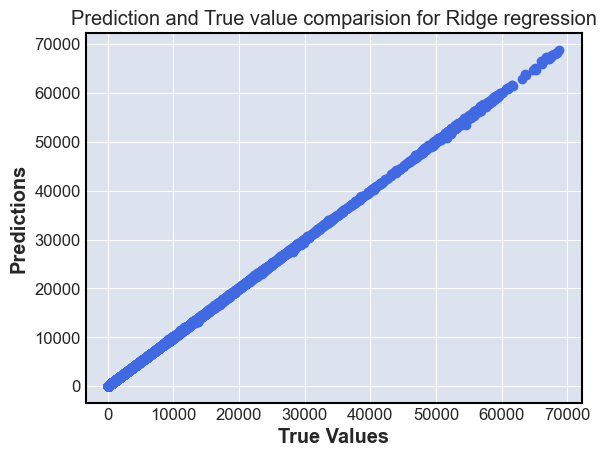

In [248]:
plt.scatter(Y_test, pred_test,color='royalblue');
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title("Prediction and True value comparision for Ridge regression")
plt.show()

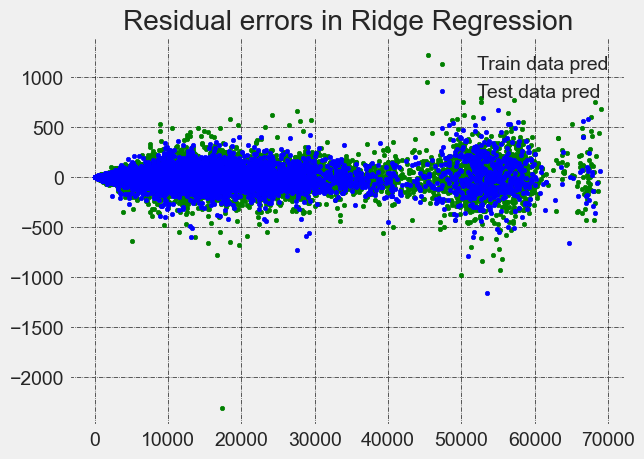

In [207]:
plt.style.use('fivethirtyeight')
plt.scatter(rg.predict(X_train), rg.predict(X_train) - Y_train,
            color = "green", s = 10, label = 'Train data pred')
plt.scatter(rg.predict(X_test), rg.predict(X_test) - Y_test,
            color = "blue", s = 10, label = 'Test data pred')

plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

plt.legend(loc = 'upper right')

plt.title("Residual errors in Ridge Regression")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)  
plt.show()

**Multiple Regression**

In [195]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import datasets, linear_model, metrics

regressor = linear_model.LinearRegression()
regressor.fit(X_train,Y_train)
predict_y = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(Y_test,predict_y))
print('Mean Squared Error : ',error)
print("Model Score:",r2_score(Y_test, predict_y))
print('Mean absolute Error:', mean_absolute_error(Y_test,predict_y))

Mean Squared Error :  48.175095332986125
Model Score: 0.9999710015288993
Mean absolute Error: 22.34661035268252


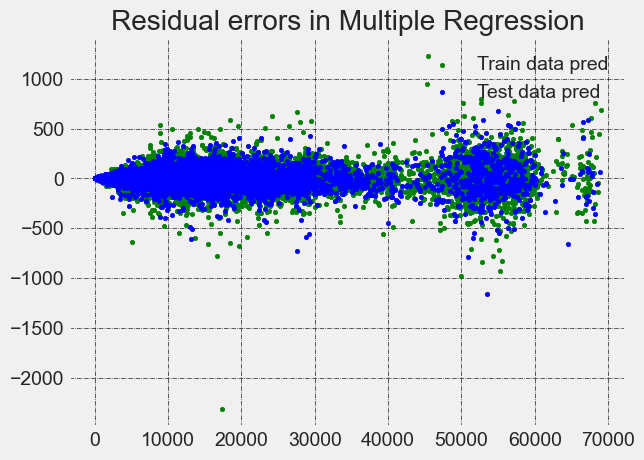

In [209]:
plt.style.use('fivethirtyeight')
## plotting residual errors in training data
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - Y_train,
            color = "green", s = 10, label = 'Train data pred')
  
## plotting residual errors in test data
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - Y_test,
            color = "blue", s = 10, label = 'Test data pred')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors in Multiple Regression")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)  
## method call for showing the plot
plt.show()

**With Grid Search CV**

In [54]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

lm = LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = [{'n_features_to_select': list(range(1, 4))}], 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, Y_train)  

import sklearn
n_features_optimal = 4

lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)
y_pred_linear = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, y_pred_linear)
print("R square",r2)
print("Test mean square error for multiple linear regression:",np.sqrt(mean_squared_error(Y_test,y_pred_linear)))
print('Mean absolute Error:', mean_absolute_error(Y_test,y_pred_linear))

Fitting 10 folds for each of 3 candidates, totalling 30 fits
R square 0.9999710015288993
Test mean square error for multiple linear regression: 48.17509533298606
Mean absolute Error: 22.34661035268173


**Plotting**

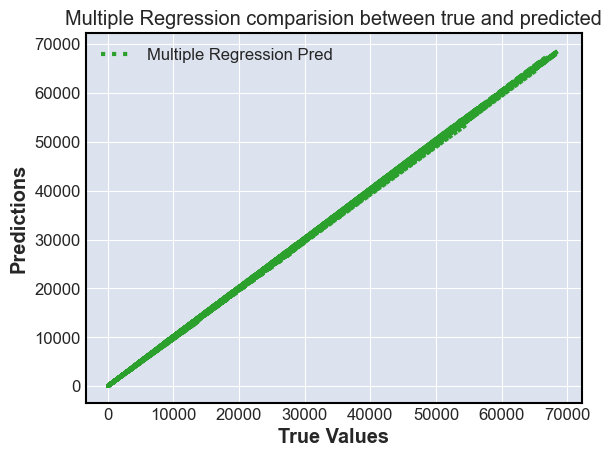

In [251]:
plt.plot(Y_test, predict_y, label='Multiple Regression Pred', c='C2', ls='dotted', lw=3);
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend();
plt.title('Multiple Regression comparision between true and predicted');

**Comparision**

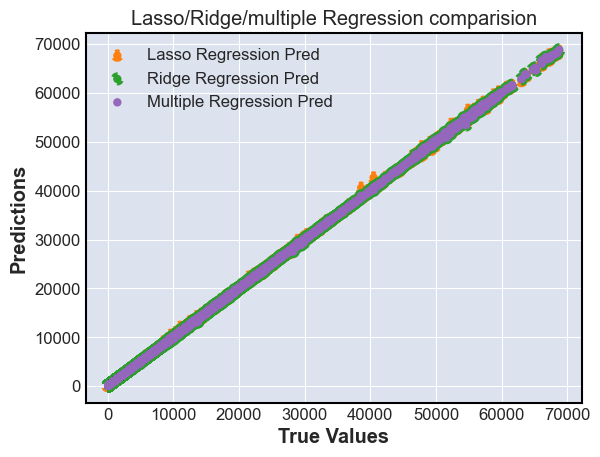

In [252]:
plt.scatter(Y_test, lasso_predictions, label='Lasso Regression Pred', c='C1', ls='dotted', lw=3);

plt.scatter(Y_test, pred_test, label='Ridge Regression Pred', c='C2', ls='dotted', lw=3.5);
plt.scatter(Y_test, predict_y, label='Multiple Regression Pred', c='C4', ls='dotted', lw=0.01);
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend();
plt.title('Lasso/Ridge/multiple Regression comparision');

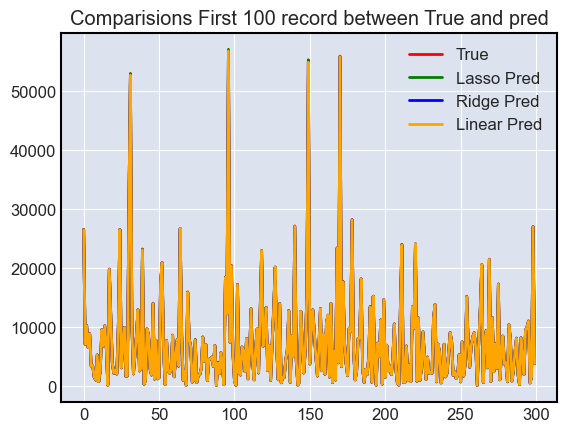

In [177]:
combine= pd.DataFrame().assign(True_val=Y_test,Lasso=lasso_predictions,Ridge=pred_test,Multiple_Reg=predict_y)
combine.index = pd.RangeIndex(len(combine.index))
combine_100 = combine.head(300)
combine_100["True_val"].plot(color='red',label="True")
combine_100["Lasso"].plot(color='green',label='Lasso Pred')
combine_100["Ridge"].plot(color='blue',label='Ridge Pred')
combine_100["Multiple_Reg"].plot(color='orange',label='Linear Pred')
plt.title("Comparisions First 100 record between True and pred")
plt.legend()
plt.show()

In [179]:
combine_100.head(10)

,True_val,Lasso,Ridge,Multiple_Reg
0,26524.789060,26486.656783,26451.899156,26451.617277
1,6995.000000,7058.450646,7012.360235,7012.230409
2,10167.450200,10253.614384,10169.368058,10169.105019
3,6474.609863,6462.412555,6474.267292,6474.243384
4,8838.629883,8807.340656,8804.415294,8804.420899
5,3375.439941,3328.916509,3359.867345,3360.047410
6,3398.949951,3366.298682,3388.439332,3388.548394
7,1486.251953,1488.478631,1486.563078,1486.549672
8,980.700012,985.276850,984.166153,984.159314
9,5229.560059,5245.295132,5225.226096,5225.150801
